# Actor processing

In [122]:
import pandas as pd
import numpy as np
import pickle
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm import tqdm

## 1. read the merged dataframe

In [2]:
df = pd.read_pickle("./characters_movies.pkl")
df

,WID,FID,MovieReleaseDate,CharacterName,ActorDOB,ActorGender,ActorHeight,ActorEthnicity,ActorName,ActorAgeAtMovieRelease,...,MovieGenres,MovieGenresSelected,MovieGenresFinal,AverageRating,NumVotes,Cannes,Berlin,Venice,OscarWinner,OscarNomination
0,975900,/m/03vyhn,2001,Akooshay,1958,F,1.620,NaN,Wanda De Jesus,42.0,...,"[Thriller, Science Fiction, Horror, Adventure,...","[Action, Adventure, Horror, Science Fiction, T...","[Action, Adventure, Horror, Science Fiction, T...",6.25,56922.0,0,0,0,0,0
1,975900,/m/03vyhn,2001,Lieutenant Melanie Ballard,1974,F,1.780,/m/044038p,Natasha Henstridge,27.0,...,"[Thriller, Science Fiction, Horror, Adventure,...","[Action, Adventure, Horror, Science Fiction, T...","[Action, Adventure, Horror, Science Fiction, T...",6.25,56922.0,0,0,0,0,0
2,975900,/m/03vyhn,2001,Desolation Williams,1969,M,1.727,/m/0x67,Ice Cube,32.0,...,"[Thriller, Science Fiction, Horror, Adventure,...","[Action, Adventure, Horror, Science Fiction, T...","[Action, Adventure, Horror, Science Fiction, T...",6.25,56922.0,0,0,0,0,0
3,975900,/m/03vyhn,2001,Sgt Jericho Butler,1967,M,1.750,NaN,Jason Statham,33.0,...,"[Thriller, Science Fiction, Horror, Adventure,...","[Action, Adventure, Horror, Science Fiction, T...","[Action, Adventure, Horror, Science Fiction, T...",6.25,56922.0,0,0,0,0,0
4,975900,/m/03vyhn,2001,Bashira Kincaid,1977,F,1.650,NaN,Clea DuVall,23.0,...,"[Thriller, Science Fiction, Horror, Adventure,...","[Action, Adventure, Horror, Science Fiction, T...","[Action, Adventure, Horror, Science Fiction, T...",6.25,56922.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413656,12476867,/m/02w7zz8,0,NaN,0,NaN,NaN,NaN,Ariel Bastian,NaN,...,"[Thriller, Horror, Slasher, Teen]","[Horror, Thriller]","[Horror, Thriller]",NaN,NaN,0,0,0,0,0
413657,12476867,/m/02w7zz8,0,NaN,0,NaN,NaN,NaN,Jared Van Snellenberg,NaN,...,"[Thriller, Horror, Slasher, Teen]","[Horror, Thriller]","[Horror, Thriller]",NaN,NaN,0,0,0,0,0
413658,28308153,/m/0cp05t9,0,NaN,1941,M,1.730,/m/02w7gg,David Hemmings,15.0,...,[Crime Fiction],[Crime],[Crime],NaN,NaN,0,0,0,0,0
413659,28308153,/m/0cp05t9,0,NaN,0,NaN,NaN,NaN,Roberta Paterson,NaN,...,[Crime Fiction],[Crime],[Crime],NaN,NaN,0,0,0,0,0


In [3]:
df.columns

Index(['WID', 'FID', 'MovieReleaseDate', 'CharacterName', 'ActorDOB',
       'ActorGender', 'ActorHeight', 'ActorEthnicity', 'ActorName',
       'ActorAgeAtMovieRelease', 'CharacterActorMapID', 'CharacterID',
       'ActorID', 'MovieName', 'MovieBoxOfficeRevenue', 'MovieRuntime',
       'MovieLanguages', 'MovieCountries', 'MovieGenres',
       'MovieGenresSelected', 'MovieGenresFinal', 'AverageRating', 'NumVotes',
       'Cannes', 'Berlin', 'Venice', 'OscarWinner', 'OscarNomination'],
      dtype='object')

## 2. add movie counts

In [ ]:
## add reason

In [4]:
# counting the movies each actor has played and append a new column "actor_movie_count"
actor_movie_count = df.groupby(df.ActorID).agg("count")
df_actor_movie_count = pd.DataFrame({"ActorMovieCount": actor_movie_count["WID"].values},
                                 index=actor_movie_count.index)
df_add_count = pd.merge(df, df_actor_movie_count, how="left", left_on="ActorID", right_index=True)
df_add_count

,WID,FID,MovieReleaseDate,CharacterName,ActorDOB,ActorGender,ActorHeight,ActorEthnicity,ActorName,ActorAgeAtMovieRelease,...,MovieGenresSelected,MovieGenresFinal,AverageRating,NumVotes,Cannes,Berlin,Venice,OscarWinner,OscarNomination,ActorMovieCount
0,975900,/m/03vyhn,2001,Akooshay,1958,F,1.620,NaN,Wanda De Jesus,42.0,...,"[Action, Adventure, Horror, Science Fiction, T...","[Action, Adventure, Horror, Science Fiction, T...",6.25,56922.0,0,0,0,0,0,8
1,975900,/m/03vyhn,2001,Lieutenant Melanie Ballard,1974,F,1.780,/m/044038p,Natasha Henstridge,27.0,...,"[Action, Adventure, Horror, Science Fiction, T...","[Action, Adventure, Horror, Science Fiction, T...",6.25,56922.0,0,0,0,0,0,23
2,975900,/m/03vyhn,2001,Desolation Williams,1969,M,1.727,/m/0x67,Ice Cube,32.0,...,"[Action, Adventure, Horror, Science Fiction, T...","[Action, Adventure, Horror, Science Fiction, T...",6.25,56922.0,0,0,0,0,0,31
3,975900,/m/03vyhn,2001,Sgt Jericho Butler,1967,M,1.750,NaN,Jason Statham,33.0,...,"[Action, Adventure, Horror, Science Fiction, T...","[Action, Adventure, Horror, Science Fiction, T...",6.25,56922.0,0,0,0,0,0,30
4,975900,/m/03vyhn,2001,Bashira Kincaid,1977,F,1.650,NaN,Clea DuVall,23.0,...,"[Action, Adventure, Horror, Science Fiction, T...","[Action, Adventure, Horror, Science Fiction, T...",6.25,56922.0,0,0,0,0,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413656,12476867,/m/02w7zz8,0,NaN,0,NaN,NaN,NaN,Ariel Bastian,NaN,...,"[Horror, Thriller]","[Horror, Thriller]",NaN,NaN,0,0,0,0,0,1
413657,12476867,/m/02w7zz8,0,NaN,0,NaN,NaN,NaN,Jared Van Snellenberg,NaN,...,"[Horror, Thriller]","[Horror, Thriller]",NaN,NaN,0,0,0,0,0,1
413658,28308153,/m/0cp05t9,0,NaN,1941,M,1.730,/m/02w7gg,David Hemmings,15.0,...,[Crime],[Crime],NaN,NaN,0,0,0,0,0,41
413659,28308153,/m/0cp05t9,0,NaN,0,NaN,NaN,NaN,Roberta Paterson,NaN,...,[Crime],[Crime],NaN,NaN,0,0,0,0,0,1


### do some descriptive statistics about movie counts

In [5]:
df_add_count["ActorMovieCount"].describe()

count    413661.000000
mean         19.127960
std          28.405472
min           1.000000
25%           2.000000
50%           9.000000
75%          25.000000
max         308.000000
Name: ActorMovieCount, dtype: float64

In [7]:
df_add_count["ActorMovieCount"].quantile(0.4)
# around 97.5% of actors have played less than 100 movies

5.0

<Axes: >

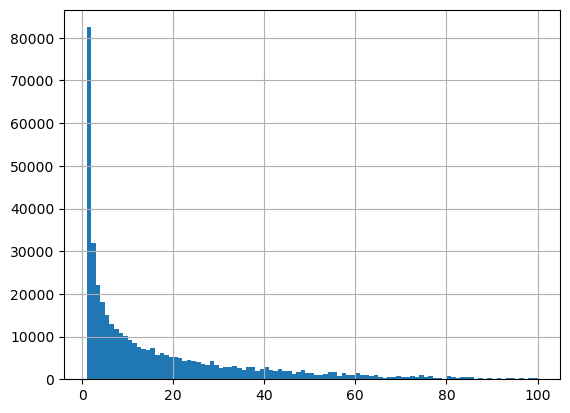

In [8]:
# plot the distribution of counts <= 100
df_add_count[df_add_count["ActorMovieCount"] <= 100]["ActorMovieCount"].hist(bins=99)

In [9]:
# filter out nan movie genres and count < 5
df_filtered = df_add_count[df_add_count["ActorMovieCount"] >= 5].copy()
df_filtered.shape[0]

259245

## 3. clean movie genres （放到movie cleansing）

### reset genres

1. only retain 20 movie genres: 'Comedy', 'Drama', 'Romance', 'Action', 'Thriller', 'Crime', 'Documentary', 'Horror', 'Adventure', 'Musical' , 'Animation', 'Science Fiction', 'Fantasy', 'Western', 'War film', 'Biography', 'Sports', 'Martial Arts Film', 'Hisorty', 'Detective'
2. align genres with similar type, e.g. ['Romance Film', 'Romantic drama', 'Romantic comedy'] -> ['Romance]
3. drop 'drama' if other types are available for that movie
4. add a new column 'movie_genres_selected'

## 4. Group by actors

In this section, we group the dataframe by actor id, so that datapoints belonging to the same actor will be compressed into one row. The grouped dataframe will be used for modeling genre changes for each actor in the next section.

### drop duplicates

We notice that some actors played multiples characters in a single movie. Since **we only consider movie genres at this stage**, we **temporarily** drop duplicate datapoints and only keep the first character in a multiple rows.

In [11]:
# drop duplicates
df_dropdup = df_filtered.drop_duplicates(subset=["FID", "WID", "ActorID"]).copy()
df_dropdup.shape[0]

257264

### sort the dataframe by actor id and age

We first filter out actors without movie release date or age information.

In [12]:
# drop nan for both "movie_release_date" and "actor_age_at_movie_release"
df_dropna = df_dropdup.dropna(subset=["MovieReleaseDate", "ActorAgeAtMovieRelease"]).copy()
df_dropna.shape[0]

207283

In [13]:
# to make the dataframe more readable, we first sort by actor id to group the datapoints of the same actor together
# Then we sort age from small to large intra-actor.

df_sorted = df_dropna.sort_values(by=['ActorID', 'ActorAgeAtMovieRelease'], ascending=True, ignore_index=True).copy()
df_sorted.shape[0]

207283

In [15]:
# to have a check
df_sorted[df_sorted["ActorName"] == "Tony Leung Chiu Wai"]["MovieGenresFinal"]

12764                                        [War film]
12765                                         [Romance]
12766            [Action, Adventure, Romance, Thriller]
12767           [Action, Adventure, Thriller, War film]
12768              [Action, Adventure, Crime, Thriller]
12769                                           [Drama]
12770                     [Action, Adventure, Thriller]
12771                                [Action, Thriller]
12772                     [Action, Adventure, Thriller]
12773    [Action, Adventure, Comedy, Romance, Thriller]
12774                     [Action, Adventure, Thriller]
12775                                           [Crime]
12776                                 [Comedy, Romance]
12777                                           [Crime]
12778                                         [Romance]
12779    [Action, Adventure, Comedy, Romance, Thriller]
12780          [Action, Adventure, Detective, Thriller]
12781                                         [R

In [16]:
df_sorted.columns

Index(['WID', 'FID', 'MovieReleaseDate', 'CharacterName', 'ActorDOB',
       'ActorGender', 'ActorHeight', 'ActorEthnicity', 'ActorName',
       'ActorAgeAtMovieRelease', 'CharacterActorMapID', 'CharacterID',
       'ActorID', 'MovieName', 'MovieBoxOfficeRevenue', 'MovieRuntime',
       'MovieLanguages', 'MovieCountries', 'MovieGenres',
       'MovieGenresSelected', 'MovieGenresFinal', 'AverageRating', 'NumVotes',
       'Cannes', 'Berlin', 'Venice', 'OscarWinner', 'OscarNomination',
       'ActorMovieCount'],
      dtype='object')

In [17]:
df_sorted

,WID,FID,MovieReleaseDate,CharacterName,ActorDOB,ActorGender,ActorHeight,ActorEthnicity,ActorName,ActorAgeAtMovieRelease,...,MovieGenresSelected,MovieGenresFinal,AverageRating,NumVotes,Cannes,Berlin,Venice,OscarWinner,OscarNomination,ActorMovieCount
0,1988341,/m/06c5z_,0,Bruce Greenberg,1964,M,1.88,/m/0xnvg,Adam Carolla,33.0,...,"[Comedy, Romance]","[Comedy, Romance]",NaN,NaN,0,0,0,0,0,10
1,26147476,/m/0b6jfrc,0,Mike's Stupid Boss,1964,M,1.88,/m/0xnvg,Adam Carolla,34.0,...,[Comedy],[Comedy],NaN,NaN,0,0,0,0,0,10
2,2981197,/m/08hjr9,2000,'The Man Show' Host,1964,M,1.88,/m/0xnvg,Adam Carolla,35.0,...,"[Comedy, Drama, Romance]","[Comedy, Romance]",5.00,15579.0,0,0,0,0,0,10
3,20619519,/m/051wrdv,0,NaN,1964,M,1.88,/m/0xnvg,Adam Carolla,35.0,...,"[Comedy, Drama, Romance]","[Comedy, Romance]",NaN,NaN,0,0,0,0,0,10
4,7197477,/m/0kv065,0,NaN,1964,M,1.88,/m/0xnvg,Adam Carolla,38.0,...,[Comedy],[Comedy],NaN,NaN,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207278,30431590,/m/0h33rzv,2012,Arnie,1967,M,1.74,/m/033tf_,Paul Giamatti,44.0,...,"[Comedy, Detective, Fantasy, Horror, Thriller]","[Comedy, Detective, Fantasy, Horror, Thriller]",6.30,39846.0,0,0,0,0,0,49
207279,31024173,/m/0gg5qcw,2011,Tom Duffy,1967,M,1.74,/m/033tf_,Paul Giamatti,44.0,...,[Drama],[Drama],7.10,228252.0,0,0,0,0,0,49
207280,31734473,/m/0gtvrv3,2012,Benno Levin,1967,M,1.74,/m/033tf_,Paul Giamatti,44.0,...,[Drama],[Drama],5.10,49512.0,0,0,0,0,0,49
207281,31306385,/m/0gj8t_b,2012,Paul Gill,1967,M,1.74,/m/033tf_,Paul Giamatti,45.0,...,"[Comedy, Drama, Musical, Romance]","[Comedy, Musical, Romance]",7.05,80813.0,0,0,0,0,0,49


### group the dataframe by actors

In [21]:
actor_groups = df_sorted.groupby("ActorID")

# convert series into list, the attributes are open to update
by_actor = actor_groups.apply(lambda x: pd.Series({"WID": x["WID"].values.tolist(),
                                                  "FID": x["FID"].values.tolist(),
                                                  "MovieReleaseDate": x["MovieReleaseDate"].values.tolist(),
                                                  "ActorGender": x["ActorGender"].iloc[0],
                                                  "ActorHeight": x["ActorHeight"].iloc[0],
                                                  "ActorAgeAtMovieRelease": x["ActorAgeAtMovieRelease"].values.tolist(),
                                                  "ActorName": x["ActorName"].iloc[0],
                                                  "ActorID": x["ActorID"].iloc[0],
                                                  "MovieName": x["MovieName"].values.tolist(),
                                                  "MovieBoxOfficeRevenue": x["MovieBoxOfficeRevenue"].values.tolist(),
                                                  "MovieLanguages": x["MovieBoxOfficeRevenue"].values.tolist(),
                                                  "MovieCountries": x["MovieCountries"].values.tolist(),
                                                  "MovieGenresFinal": x["MovieGenresFinal"].values.tolist(),
                                                  "AverageRating": x["AverageRating"].values.tolist(),
                                                  "NumVotes": x["NumVotes"].values.tolist(),
                                                  "Cannes": x["Cannes"].values.tolist(),
                                                  "Berlin": x["Berlin"].values.tolist(),
                                                  "Venice": x["Venice"].values.tolist(),
                                                  "OscarWinner": x["OscarWinner"].values.tolist(),
                                                  "OscarNomination": x["OscarNomination"].values.tolist(),
                                                  "ActorMovieCount": x["ActorMovieCount"].iloc[0]}))

by_actor.to_pickle("by_actor_new_1117.pkl")

## 5. Detect change

In this section, we use a sliding window to detect changes of genres.

In [22]:
# restore the grouped dataframe
df_actor = pd.read_pickle("by_actor_new_1117.pkl")
df_actor.shape[0]

15001

In [23]:
df_actor

,WID,FID,MovieReleaseDate,ActorGender,ActorHeight,ActorAgeAtMovieRelease,ActorName,ActorID,MovieName,MovieBoxOfficeRevenue,...,MovieCountries,MovieGenresFinal,AverageRating,NumVotes,Cannes,Berlin,Venice,OscarWinner,OscarNomination,ActorMovieCount
ActorID,,,,,,,,,,,,,,,,,,,,,
/m/010p3,"[1988341, 26147476, 2981197, 20619519, 7197477...","[/m/06c5z_, /m/0b6jfrc, /m/08hjr9, /m/051wrdv,...","[0, 0, 2000, 0, 0, 0, 2009, 2011]",M,1.88,"[33.0, 34.0, 35.0, 35.0, 38.0, 42.0, 44.0, 47.0]",Adam Carolla,/m/010p3,"[Hairshirt, Splendor, Down to You, After Sex, ...","[nan, nan, 24419914.0, nan, nan, nan, nan, 855...",...,"[United States of America, United States of Am...","[[Comedy, Romance], [Comedy], [Comedy, Romance...","[nan, nan, 5.0, nan, nan, nan, 4.9, 3.5]","[nan, nan, 15579.0, nan, nan, nan, 6920.0, 278...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]",10
/m/010xjr,"[19165774, 6984559, 3992363, 27500360, 1833819...","[/m/04ld76k, /m/0gzy02, /m/0bbgvp, /m/0c01km0,...","[0, 1961, 1962, 1964, 0, 1965, 1966, 1967, 196...",M,1.85,"[28.0, 30.0, 32.0, 33.0, 33.0, 34.0, 35.0, 36....",Richard Harris,/m/010xjr,"[The Wreck of the Mary Deare, The Guns of Nava...","[nan, nan, nan, nan, nan, nan, 34900023.0, 407...",...,"[United States of AmericaUnited Kingdom, Unite...","[[Action, Adventure, Thriller], [Action, Adven...","[nan, 7.5, 7.2, nan, nan, 6.7, nan, 5.5, 6.5, ...","[nan, 54142.0, 17413.0, nan, nan, 8639.0, nan,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",52
/m/0112yl,"[867952, 1414550, 867905, 2553318, 187603, 143...","[/m/03jzwk, /m/04_m45, /m/03jzs6, /m/07mlgp, /...","[1948, 1949, 1949, 1950, 1950, 1951, 0, 1954, ...",M,1.74,"[28.0, 28.0, 29.0, 30.0, 30.0, 31.0, 31.0, 34....",Toshiro Mifune,/m/0112yl,"[Drunken Angel, The Quiet Duel, Stray Dog, Sca...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",...,"[Japan, Japan, Japan, Japan, Japan, Japan, Jap...","[[Drama], [Drama], [Crime, Thriller], [Comedy]...","[7.6, 7.4, 7.8, 7.2, 8.2, nan, nan, 8.6, nan, ...","[13004.0, 3750.0, 18435.0, 4521.0, 176567.0, n...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",43
/m/011_3s,"[16146028, 2241866, 2394082, 582398, 3499995, ...","[/m/03wb7yx, /m/06ylsm, /m/078_66, /m/02s9k_, ...","[1977, 1978, 1981, 1980, 1984, 1988, 1991, 199...",F,1.73,"[37.0, 39.0, 41.0, 41.0, 45.0, 48.0, 52.0, 52....",Lily Tomlin,/m/011_3s,"[The Late Show, Moment by Moment, The Incredib...","[nan, 10963824.0, 18400000.0, 103290500.0, 364...",...,"[United States of America, United States of Am...","[[Action, Adventure, Comedy, Crime, Detective,...","[6.9, 3.1, 5.5, nan, 6.6, 6.4, 7.5, nan, 5.0, ...","[3134.0, 1319.0, 5052.0, nan, 19448.0, 15157.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",31
/m/011_c4,"[434542, 98503, 9682483, 22338916, 508044, 152...","[/m/0281z4, /m/0p7pw, /m/02pp0b5, /m/05t03fh, ...","[1967, 1966, 0, 0, 0, 0, 0]",F,NaN,"[37.0, 37.0, 42.0, 42.0, 42.0, 43.0, 44.0]",Vivien Merchant,/m/011_c4,"[Accident, Alfie, The Offence, Under Milk Wood...","[nan, nan, nan, nan, 12600000.0, nan, nan]",...,"[United Kingdom, United Kingdom, United States...","[[Crime, Romance], [Comedy, Romance], [Crime],...","[6.8, 7.0, nan, nan, nan, nan, nan]","[4878.0, 15474.0, nan, nan, nan, nan, nan]","[0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0]","[0, 0, 0

### define functions

In [114]:
def get_actor_id(actor_name, df):
    
    return df[df["ActorName"] == actor_name].index.tolist()[0]
    


def flatten_list(lst):
    """
    Convert a nested list to a flattened list.
    
    Parameters:
    - lst: a nested list whose elements are lists.
    
    Returns:
    - A list. 
    """
    flattened_list = []
    for sublist in lst:
        flattened_list += sublist
        
    return flattened_list


def argmax_list(lst):
    """
    Obtain the most common element(s) in a list.
    
    Parameters:
    - list: a list.
    
    Returns:
    - A list of unique elements with the highest frequency.
    """
    counter_obj = Counter(lst)
    most_common_elements = counter_obj.most_common()
    max_count = most_common_elements[0][1]
    most_common_items = [element for element, count in most_common_elements if count == max_count]
    
    return most_common_items


def check_same_freq(most_common, lst):

    return len(most_common) == len(set(lst))


def check_complete_change(lst1, lst2):
    
    return not bool(set(lst1) & set(lst2))


def jaccard_sim(set1, set2):
    
    return len((set(set1) & set(set2))) / len((set(set1)) | set(set2))


def detect_change(genre_list, hist_size=3, max_sim=0.25):
    """

    """
    n_change = 0
    history = []
    change_values = []
    
    # consider all the history
    if hist_size == -1:

        for movie_id, genres in enumerate(genre_list):
            
            if movie_id == 0:
                history.append(genres)
                change_values.append(0)
                continue

            if jaccard_sim(genres, flatten_list(history[:])) <= max_sim and jaccard_sim(genres, flatten_list(history[:])) >= 0:
                change_values.append(1)
            else:
                change_values.append(0)
            history.append(genres)

    elif hist_size > 0:
        
        for movie_id, genres in enumerate(genre_list):
            
            if movie_id == 0:
                history.append(genres)
                change_values.append(0)
                continue

            if jaccard_sim(genres, flatten_list(history[-hist_size:])) <= max_sim or jaccard_sim(genres, flatten_list(history[:])) == 0:
                change_values.append(1)
            else:
                change_values.append(0)
            history.append(genres)
    
    return change_values


def extract_window_values(genre_list, max_window_size=3):
    """
    Calculate the sliding window values for a list of genres.
    
    Parameters:
    - genre_list: list of lists, where each sublist contains genres of a movie.
    - window_size: integer, the size of the sliding window.
    
    Returns:
    - A tuple (window_values, argmax_types) where:
        - window_values: list of window values calculated based on changes in the most common genres.
        - argmax_types: list of the most common genres (argmax) in each window.
    """
    initial_window_size = int(max_window_size - (max_window_size-1)/2) #This will store initial window_size
    window_values = []   # This will store the most common genres in each window
    
    # Start with the initial window size and increase until we reach the max window size
    for end in range(initial_window_size - 1, len(genre_list)):
        start = max(0, end - max_window_size)  # Determine the start of the window
        window_genres = flatten_list(genre_list[start:end])  # Flatten the genres within the window
        new_argmax_values = argmax_list(window_genres)  # Find the most common genres in the window

        window_values.append(new_argmax_values)

        # Once we reach the max window size, start moving the start of the window
        if (end-start) == max_window_size:
            start += 1

    # At the end, handle the last windows that are smaller than the max window size
    for window_size in range(max_window_size - 1, initial_window_size - 1, -1):
        start = len(genre_list) - window_size
        window_genres = flatten_list(genre_list[start:])
        new_argmax_values = argmax_list(window_genres)
        
        window_values.append(new_argmax_values)

    return window_values


def count_total_change(genre_list):
    """
    Count the number of total changes, where all genres are new.
    
    Parameters:
    - genre_list: list of lists (length > 1), where each sublist contains genres of a movie.
    
    Returns:
    - An integer that represents the number of total changes.
    """
    n_change = 0
    seen_genres = set()
    
    for movie_id, genres in enumerate(genre_list):
        # if accumulated genre is an empty list
        if movie_id == 0:
            for g in genres:
                seen_genres.add(g)
            continue
         
        curr_n = len(seen_genres)
        for g in genres:
            seen_genres.add(g)
        now_n = len(seen_genres)
        
        if now_n - curr_n == len(genres):
            n_change += 1
    
    return n_change


def vectorize_movie(genre_list, emb):
    """
    Vectorize each movie .
    
    Parameters:
    - genre_list: list of lists (length > 1), where each sublist contains genres of a movie.
    
    Returns:
    - A 2-d numpy array.
    """
    
    movie_embbedings = np.zeros((len(genre_list), 768))
    for i, row in enumerate(genre_list):
        arr = np.zeros((len(row), 768))
        for j, genre in enumerate(row):
            arr[j, :] = emb[genre]
        movie_emb = np.mean(arr, axis=0)
        movie_embbedings[i] = movie_emb
    
    return movie_embbedings
    
    

def cluster_an_actor(actor_id, df_actor, emb, reduce_dim=False, dim=3):
    """

    """
    row = df_actor[df_actor["ActorID"] == actor_id]
    
    # extract the features belonging to the actor
    actor_name = row["ActorName"].iloc[0]
    movie_name = row["MovieName"].iloc[0]
    actor_age = row["ActorAgeAtMovieRelease"].iloc[0]
    movie_genres_selected = row["MovieGenresFinal"].iloc[0]
    
    n_change = count_total_change(movie_genres_selected)
    v_movies = vectorize_movie(movie_genres_selected, emb)
    
    if reduce_dim:
        # to do
        pass
    
    k = n_change + 1
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(v_movies).tolist()
    
    actor_genre_clusters = pd.DataFrame({"ActorName": [actor_name] * len(movie_name),
                                        "MovieName": movie_name,
                                        "ActorAge": actor_age,
                                        "Genre": movie_genres_selected,
                                        "genre_cluster": clusters})

    return actor_genre_clusters


def detect_change_an_actor(actor_id, df, window_size=3, hist_size=3, max_sim=0.25):
    # get the row from the dataframe
    row = df[df["ActorID"] == actor_id]
    
    
    # 计算滑动事件窗口相关特征
    window_value = extract_window_values(row["MovieGenresFinal"].iloc[0], max_window_size=window_size) # 返回两个列表
    window_change = detect_change(window_value, hist_size=hist_size, max_sim=max_sim)
    
    # 为这名演员准备一个新表
    actor_changes = pd.DataFrame({"ActorName": row["ActorName"].iloc[0],
                                  "ActorID": row["ActorID"].iloc[0],
                                  "MovieName": row["MovieName"].iloc[0],
                                  "MovieReleaseDate": row["MovieReleaseDate"].iloc[0],
                                  "Genres": row["MovieGenresFinal"].iloc[0],
                                  "AverageRating": row["AverageRating"].iloc[0],
                                  "NumVote": row["NumVotes"].iloc[0],
                                  "MovieBoxOfficeRevenue": row["MovieBoxOfficeRevenue"].iloc[0],
                                  "ActorDOB": row["ActorGender"].iloc[0],
                                  "ActorAge": row["ActorAgeAtMovieRelease"].iloc[0],
                                  "Cannes": row["Cannes"].iloc[0],
                                  "Berlin": row["Berlin"].iloc[0],
                                  "Venice": row["Venice"].iloc[0],
                                  "OscarWinner": row["OscarWinner"].iloc[0],
                                  "OscarNomination": row["OscarNomination"].iloc[0]})
    
    actor_changes["WindowValues"] = window_value
    actor_changes["WindowChange"] = window_change
    
    return actor_changes

In [109]:
df.columns

Index(['WID', 'FID', 'MovieReleaseDate', 'CharacterName', 'ActorDOB',
       'ActorGender', 'ActorHeight', 'ActorEthnicity', 'ActorName',
       'ActorAgeAtMovieRelease', 'CharacterActorMapID', 'CharacterID',
       'ActorID', 'MovieName', 'MovieBoxOfficeRevenue', 'MovieRuntime',
       'MovieLanguages', 'MovieCountries', 'MovieGenres',
       'MovieGenresSelected', 'MovieGenresFinal', 'AverageRating', 'NumVotes',
       'Cannes', 'Berlin', 'Venice', 'OscarWinner', 'OscarNomination'],
      dtype='object')

In [ ]:
def detect_change_an_actor(actor_id, df, window_size=[3], hist_size=[3], max_sim=0.25):
    # get the row from the dataframe
    row = df[df["ActorID"] == actor_id]
    
    # extract the features belonging to the actor
    actor_name = row["ActorName"].iloc[0]
    movie_name = row["MovieName"].iloc[0]
    actor_age = row["ActorAgeAtMovieRelease"].iloc[0]
    movie_genres_selected = row["MovieGenresFinal"].iloc[0]
    movie_revenue = row["MovieBoxOfficeRevenue"].iloc[0]
    movie_rating = row["AverageRating"].iloc[0]
    movie_nvote = row["NumVotes"].iloc[0]
    cannes = row["Cannes"].iloc[0]
    berlin = row["Berlin"].iloc[0]
    venice = row["Venice"].iloc[0]
    oscar_win = row["OscarWinner"].iloc[0]
    oscar_nom = row["OscarNomination"].iloc[0]
    
    # prepare columns
    window_value_cols = []
    window_change_cols = []
    change_value_cols = []
    
    # 计算滑动事件窗口相关特征
    for ws in window_size:
        window_value = extract_window_values(movie_genres_selected, max_window_size=ws) # 返回两个列表
        window_value_cols.append(window_value)
        
        window_change = detect_change(window_value, hist_size=1, max_sim=0.25)
        window_change_cols.append(window_change)
    
    for hs in hist_size:
        change_value = detect_change(movie_genres_selected, hist_size=hs)
        change_value_cols.append(change_value)
        

    n_change = count_total_change(movie_genres_selected)
    v_movies = vectorize_movie(movie_genres_selected, emb)
    
    k = n_change + 1
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(v_movies).tolist()
    
    # 为这名演员准备一个新表
    actor_changes = pd.DataFrame({"ActorName": [actor_name] * len(movie_name),
                                  "MovieName": movie_name,
                                  "AverageRating": movie_rating,
                                  "NumVote": movie_nvote,
                                  "MovieBoxOfficeRevenue": movie_revenue,
                                  "ActorAge": actor_age,
                                  "Cannes": cannes,
                                  "Berlin": berlin,
                                  "Venice": venice,
                                  "OscarWinner": oscar_win,
                                  "OscarNomination": oscar_nom,
                                  "Genres": movie_genres_selected})
    
    actor_changes["cluster"] = clusters
    
    for i in range(len(hist_size)):
        actor_changes["change_hs_{}_ts_{}".format(str(hist_size[i]), str(threshold))] = change_value_cols[i]
    
    for i in range(len(window_size)):
        actor_changes["window_values_ws_{}_ts_{}".format(str(window_size[i]), str(threshold))] = window_value_cols[i]
        actor_changes["window_change_ws_{}_ts_{}".format(str(window_size[i]), str(threshold))] = window_types_cols[i]
    
    return actor_changes

In [28]:
df_actor_new.columns

Index(['WID', 'FID', 'MovieReleaseDate', 'ActorGender', 'ActorHeight',
       'ActorAgeAtMovieRelease', 'ActorName', 'ActorID', 'MovieName',
       'MovieBoxOfficeRevenue', 'MovieLanguages', 'MovieCountries',
       'MovieGenresFinal', 'AverageRating', 'NumVotes', 'Cannes', 'Berlin',
       'Venice', 'OscarWinner', 'OscarNomination', 'ActorMovieCount'],
      dtype='object')

In [120]:
# apply window to one actor as an example
actor_name = "Charlize Theron"
actor_id = get_actor_id(actor_name, df_actor_new)
df1 = detect_change_an_actor(actor_id, df_actor_new, window_size=3, hist_size=1, max_sim=0.25)
df1["ChangeCounts"] = df1["WindowChange"].eq(1).sum()
display(df1)
# df1.to_excel("detect_change_{}.xlsx".format(actor_name))

,ActorName,ActorID,MovieName,MovieReleaseDate,Genres,AverageRating,NumVote,MovieBoxOfficeRevenue,ActorDOB,ActorAge,Cannes,Berlin,Venice,OscarWinner,OscarNomination,WindowValues,WindowChange,ChangeCounts
0,Charlize Theron,/m/01l9p,Children of the Corn III: Urban Harvest,1995,[Horror],4.300000,8166.0,NaN,F,20.0,0,0,0,0,0,[Horror],0,9
1,Charlize Theron,/m/01l9p,Trial and Error,1997,"[Comedy, Romance]",7.200000,7938.0,14598571.0,F,21.0,0,0,0,0,0,"[Horror, Comedy, Romance]",0,9
2,Charlize Theron,/m/01l9p,That Thing You Do!,1996,"[Comedy, Musical, Romance]",7.000000,72417.0,34585416.0,F,21.0,0,0,0,0,0,"[Comedy, Romance]",0,9
3,Charlize Theron,/m/01l9p,2 Days in the Valley,1996,"[Comedy, Crime]",6.500000,21341.0,11132900.0,F,21.0,0,0,0,0,0,[Comedy],0,9
4,Charlize Theron,/m/01l9p,The Devil's Advocate,1997,"[Horror, Thriller]",7.500000,393275.0,152944660.0,F,22.0,0,0,0,0,0,[Comedy],0,9
5,Charlize Theron,/m/01l9p,Mighty Joe Young,1998,"[Action, Adventure, Fantasy, Thriller]",5.700000,30332.0,50632037.0,F,23.0,0,0,0,0,0,[Thriller],1,9
6,Charlize Theron,/m/01l9p,Celebrity,1998,[Comedy],6.300000,28037.0,5078660.0,F,23.0,0,0,0,0,0,[Thriller],0,9
7,Charlize Theron,/m/01l9p,The Astronaut's Wife,1999,"[Horror, Science Fiction, Thriller]",5.400000,56962.0,19598588.0,F,24.0,0,0,0,0,0,[Thriller],0,9
8,Charlize Theron,/m/01l9p,The Yards,2000,"[Crime, Thriller]",6.400000,22483.0,889352.0,F,24.0,0,0,0,0,0,[Thriller],0,9
9,Charlize Theron,/m/01l9p,The Cider House Rules,1999,[Romance],7.400000,103455.0,88545092.0,F,24.0,0,0,0,0,0,[Thriller],0,9


In [30]:
emb = pd.read_pickle("embedding_averaged.pkl")

In [121]:
# detect changes of SELECTED actors by Name

actor_name = ["Brad Pitt", "Tom Hanks", "Emma Watson", "Tom Cruise", "Jackie Chan", "Tony Leung Chiu Wai", "Anne Hathaway", "Meryl Streep",
              "Leonardo DiCaprio", "Gong Li", "Charlize Theron", "Johnny Depp",
             "Cate Blanchett", "Christian Bale", "Scarlett Johansson", "Natalie Portman", "Ryan Gosling",
             "Viola Davis", "Matthew McConaughey"]

df_selected_actors = None

for actor in actor_name:
    actor_id = get_actor_id(actor, df_actor_new)
    df1 = detect_change_an_actor(actor_id, df_actor_new, window_size=3, hist_size=1, max_sim=0.25)
    df1["ChangeCounts"] = df1["WindowChange"].eq(1).sum()
    
    df_selected_actors = pd.concat([df_selected_actors, df1], axis=0, ignore_index=True)

display(df_selected_actors)
df_selected_actors.to_excel("detect_all_new_new.xlsx")

,ActorName,ActorID,MovieName,MovieReleaseDate,Genres,AverageRating,NumVote,MovieBoxOfficeRevenue,ActorDOB,ActorAge,Cannes,Berlin,Venice,OscarWinner,OscarNomination,WindowValues,WindowChange,ChangeCounts
0,Brad Pitt,/m/0c6qh,No Man's Land,1987,"[Action, Crime]",6.10,5226.0,2877571.0,M,23.0,0,0,0,0,0,"[Action, Crime]",0,9
1,Brad Pitt,/m/0c6qh,The Dark Side of the Sun,0,[Romance],NaN,NaN,NaN,M,24.0,0,0,0,0,0,"[Action, Crime, Romance]",0,9
2,Brad Pitt,/m/0c6qh,Cutting Class,0,"[Comedy, Crime, Horror, Thriller]",NaN,NaN,NaN,M,25.0,0,0,0,0,0,[Crime],0,9
3,Brad Pitt,/m/0c6qh,Too Young to Die?,1990,[Crime],5.90,4171.0,NaN,M,26.0,0,0,0,0,0,[Crime],0,9
4,Brad Pitt,/m/0c6qh,The Image,1990,[Drama],5.50,288.0,NaN,M,26.0,0,0,0,0,0,[Crime],0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,Matthew McConaughey,/m/02mjf2,The Dry Gulch Kid,0,"[Adventure, Comedy]",NaN,NaN,NaN,M,41.0,0,0,0,0,0,[Comedy],0,7
665,Matthew McConaughey,/m/02mjf2,Killer Joe,2011,"[Comedy, Crime, Thriller]",6.70,81934.0,2227635.0,M,41.0,0,0,0,0,0,[Comedy],0,7
666,Matthew McConaughey,/m/02mjf2,Bernie,2011,"[Comedy, Crime]",6.80,62475.0,9191638.0,M,41.0,0,0,0,0,0,[Comedy],0,7
667,Matthew McConaughey,/m/02mjf2,The Lincoln Lawyer,2011,"[Crime, Thriller]",7.30,249732.0,85507593.0,M,41.0,0,0,0,0,0,[Crime],1,7


In [117]:
# detect changes of ALL actors
characters_movies_add_three_cols = None

for actor_id in tqdm(df_actor_new.ActorID.values):
    df1 = detect_change_an_actor(actor_id, df_actor_new, window_size=3, hist_size=1, max_sim=0.25)
    df1["ChangeCounts"] = df1["WindowChange"].eq(1).sum()
    characters_movies_add_three_cols = pd.concat([characters_movies_add_three_cols, df1], axis=0, ignore_index=True)

display(characters_movies_add_three_cols)
# df_selected_actors.to_excel("detect_all_new_new.xlsx")

100%|████████████████████████████████████████████████████████████████████████████| 15001/15001 [03:35<00:00, 69.52it/s]


,ActorName,ActorID,MovieName,MovieReleaseDate,Genres,AverageRating,NumVote,MovieBoxOfficeRevenue,ActorDOB,ActorAge,Cannes,Berlin,Venice,OscarWinner,OscarNomination,WindowValues,WindowChange,ChangeCounts
0,Adam Carolla,/m/010p3,Hairshirt,0,"[Comedy, Romance]",NaN,NaN,NaN,M,33.0,0,0,0,0,0,"[Comedy, Romance]",0,0
1,Adam Carolla,/m/010p3,Splendor,0,[Comedy],NaN,NaN,NaN,M,34.0,0,0,0,0,0,[Comedy],0,0
2,Adam Carolla,/m/010p3,Down to You,2000,"[Comedy, Romance]",5.00,15579.0,24419914.0,M,35.0,0,0,0,0,0,[Comedy],0,0
3,Adam Carolla,/m/010p3,After Sex,0,"[Comedy, Romance]",NaN,NaN,NaN,M,35.0,0,0,0,0,0,[Comedy],0,0
4,Adam Carolla,/m/010p3,Windy City Heat,0,[Comedy],NaN,NaN,NaN,M,38.0,0,0,0,0,0,[Comedy],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207278,Paul Giamatti,/m/0zcbl,John Dies at the End,2012,"[Comedy, Detective, Fantasy, Horror, Thriller]",6.30,39846.0,NaN,M,44.0,0,0,0,0,0,[Comedy],0,14
207279,Paul Giamatti,/m/0zcbl,The Ides of March,2011,[Drama],7.10,228252.0,75993061.0,M,44.0,0,0,0,0,0,[Drama],1,14
207280,Paul Giamatti,/m/0zcbl,Cosmopolis,2012,[Drama],5.10,49512.0,6063556.0,M,44.0,0,0,0,0,0,[Drama],0,14
207281,Paul Giamatti,/m/0zcbl,Rock of Ages,2012,"[Comedy, Musical, Romance]",7.05,80813.0,55518613.0,M,45.0,0,0,0,0,0,[Drama],0,14


In [119]:
characters_movies_add_three_cols.to_pickle("characters_movies_add_three_cols.pkl")